### Fully-connected Layer(Dense Layer)
## $H(x) = Wx + b$
### - x = [1,2,3]
### - y = [1,2,3]

In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1,bias=True)
    def forward(self,x):
        return self.linear(x)
    

In [3]:
class model_parameter(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.rand(1,1),requires_grad=True)
        self.B = nn.Parameter(torch.rand(1,1),requires_grad=True)
        
    def forward(self,x):
        return ((self.W * x) + self.B)

In [4]:
model1 = model()
model2 = model_parameter()

In [5]:
x_train = torch.tensor(np.array([1,2,3]).reshape(-1,1),dtype=torch.float)
y_train = torch.tensor(np.array([1,2,3]).reshape(-1,1))

# Cost or Loss function
## $cost(W,b) = \frac{1}{m} \sum_{i=1}^{m} {(H(x^{(i)})-y^{(i)})^2}$

In [6]:
class mean_squred_error(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x,y):
        return torch.mean(torch.square(x-y))

In [7]:
cost = mean_squred_error()

## Optimizer (Stochastic Gradient Descent)
### $\theta = \theta - \eta \nabla_{\theta}J(\theta)$

In [8]:
learning_rate = 0.01
optim1 = torch.optim.SGD(model1.parameters(),lr=learning_rate)
optim2 = torch.optim.SGD(model2.parameters(),lr=learning_rate)

In [9]:
epochs = 1000

In [10]:
check_gradient = False
saved_loss1 = []
for epoch in range(epochs):
    '''
    optim1.zero_grad()는 무엇을 하는 작업인가?
    '''
#     if check_gradient == False:
#         print('before zero.grad() : ', model1.linear.weight.grad)
    optim1.zero_grad()
#     if check_gradient == False:
#         print('after zero.grad() : ', model1.linear.weight.grad)
#         check_gradient = True
    
    pred = model1(x_train)
    
    loss = cost(pred,y_train)
    saved_loss1.append(loss.item())
    
    '''
    아래의 loss.backward() 와 optim.step() 이 의미하는 바는?
    '''
#     print('before back-propagation() : ', model1.linear.weight.grad)
#     print(f'before back-propagation : {model1.linear.weight[0]}')
    loss.backward()
#     print('after back-propagation() : ', model1.linear.weight.grad)
#     print(f'before update(step) : {model1.linear.weight[0]}')
    optim1.step()
#     print(f'after update(step) : {model1.linear.weight[0]}')
    

In [11]:
print(model1.linear.weight,model1.linear.bias)

Parameter containing:
tensor([[0.9612]], requires_grad=True) Parameter containing:
tensor([0.0882], requires_grad=True)


In [12]:
saved_loss2 = []
for epoch in range(epochs):
    optim2.zero_grad()
    
    pred = model2(x_train)
    
    loss = cost(pred,y_train)
    saved_loss2.append(loss.item())
    loss.backward()
    optim2.step()

In [13]:
print(model2.W, model2.B)

Parameter containing:
tensor([[0.9672]], requires_grad=True) Parameter containing:
tensor([[0.0746]], requires_grad=True)


In [14]:
import matplotlib.pyplot as plt

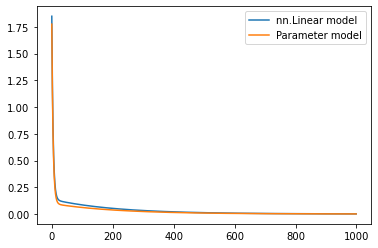

In [15]:
plt.plot(saved_loss1,label='nn.Linear model')
plt.plot(saved_loss2,label='Parameter model')
plt.legend()
plt.show()

In [16]:
print(f'Linear layer weights : {model1.linear.weight} Linear layer bias : {model1.linear.bias}')
print(f'Linear layer weights : {model2.W} Linear layer bias : {model2.B}')

Linear layer weights : Parameter containing:
tensor([[0.9612]], requires_grad=True) Linear layer bias : Parameter containing:
tensor([0.0882], requires_grad=True)
Linear layer weights : Parameter containing:
tensor([[0.9672]], requires_grad=True) Linear layer bias : Parameter containing:
tensor([[0.0746]], requires_grad=True)


## Our Goal $\rightarrow$ $W \approx 1$ and $B \approx 0$